In [1]:
# https://github.com/HIPS/autograd/blob/master/docs/tutorial.md

import autograd.numpy as np       # wrapped numpy
import matplotlib.pyplot as plt
import GPy 

from autograd import grad
from autograd import elementwise_grad as egrad


# Orthonormal basis for $L_2(\mathbb{R}^n, \mu)$

## Hermite polynomials 

In [2]:
def exp2(x):
    y = np.exp(-x**2)
    return(y)

def hPoly(x, k):
    gradF = exp2
    for i in np.arange(1, k+1):
        gradF = egrad(gradF)
    y = (-1)**k *  np.exp(x**2) * gradF(x)
    return(y)

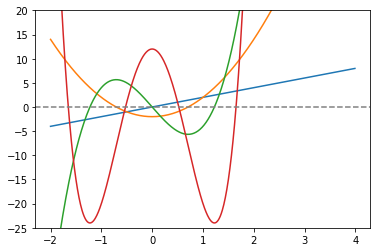

In [3]:
x = np.arange(-2, 4, 0.01)

order = 4
for k in range(1, order + 1):
    y = hPoly(x, k)
    plt.plot(x, y)
    
plt.ylim(-25, 20)
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.show()

## Finite spectral density

$$
k_{\lambda}^N(x, y) = \sum_{i = 1}^N \lambda_i \phi_i(x) \ \phi_i(y)
$$


In [4]:
def eValRFB(k, s, l):
    v = s**2
    l2 = l**2
    
    a = 1/(4*v)
    b = 1/(2*l2)
    c = np.sqrt(a**2 +2*a*b)
    
    A = a + b + c
    B = b/A
    
    L = np.sqrt(2*a/A) * B**k
    
    return(L)
    

In [5]:
def eFunRFB(x, k, s, l):
    v = s**2
    l2 = l**2
    
    a = 1/(4*v)
    b = 1/(2*l2)
    c = np.sqrt(a**2 + 2*a*b)
    
    e = np.exp(-(c - a) * (x**2))
    h = hPoly(np.sqrt(2*c)*x, k)
    
    return(e * h)

In [6]:
x = np.arange(-6, 6, 0.01)
npts = x.shape[0]

l = 0.3
s = 5

y0 = eFunRFB(x, 0, s, l)
y1 = eFunRFB(x, 1, s, l)
y2 = eFunRFB(x, 2, s, l)
y3 = eFunRFB(x, 3, s, l)


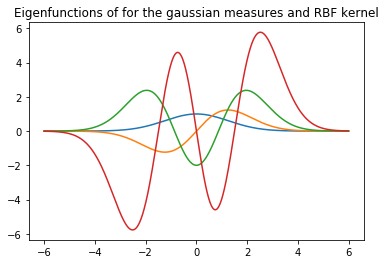

In [7]:
plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.title('Eigenfunctions of for the gaussian measures and RBF kernel')
plt.show()

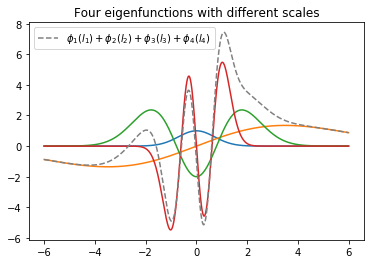

In [8]:
y0 = eFunRFB(x, 0, s, 0.1)
y1 = eFunRFB(x, 1, s, 2)
y2 = eFunRFB(x, 2, s, 0.25)
y3 = eFunRFB(x, 3, s, 0.05)

plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y0 + y1 + y2 + y3, label = '$\phi_1(l_1) + \phi_2(l_2) + \phi_3(l_3) + \phi_4(l_4)$', color = 'grey', linestyle = '--')
plt.legend()
plt.title('Four eigenfunctions with different scales')
plt.show()

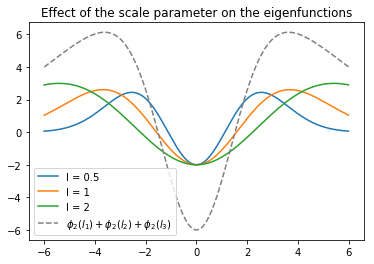

In [9]:
y0 = eFunRFB(x, 2, s, 0.5)
y1 = eFunRFB(x, 2, s, 1)
y2 = eFunRFB(x, 2, s, 2)

plt.plot(x, y0, label = 'l = 0.5')
plt.plot(x, y1, label = 'l = 1')
plt.plot(x, y2, label = 'l = 2')
plt.plot(x, y0 + y1 + y2, label = '$\phi_2(l_1) + \phi_2(l_2) + \phi_2(l_3)$', color = 'grey', linestyle = '--')



plt.legend()
plt.title('Effect of the scale parameter on the eigenfunctions')
plt.show()

## Degenerate Gaussian Process

The process:

$$
f_{\lambda}^N(x) = \sum_{i = 1}^N (\lambda_i)^{1/2} \phi_i(x) \ \omega_i
$$

where:

$$
\omega_i \sim \mathcal{N}(0, \sigma^2), \ iid.
$$

In [18]:
nEigVals = 10
mu = np.zeros((nEigVals))
K = np.eye(nEigVals)

wR = np.random.multivariate_normal(mu, K, 3)
w = np.transpose(wR)

In [21]:
phiMat = np.zeros((npts, nEigVals))

for k in np.arange(0, nEigVals):
    
    lam = eValRFB(k, s, l)
    y = eFunRFB(x, k, s, l)
    phiMat[:, k] = lam * y
    #phiMat[:, k] = y

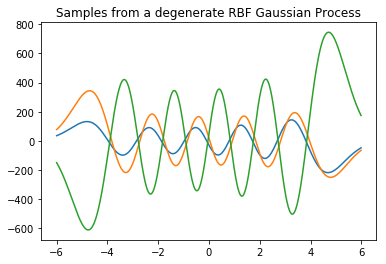

In [22]:
f = np.dot(phiMat, w)

plt.plot(x, f)
plt.title('Samples from a degenerate RBF Gaussian Process')
plt.show()